# Results
This notebook is to check the results. First we will load the best model that was found during hyperparameter tuning (in this case the RandomForestRegressor) and visualise the predictions on the test data set.

In [1]:
import pandas as pd
import os
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


from utils.tabular_data import load_airbnb_data

In [2]:
reg_model = joblib.load("models/regression/RandomForestRegressor/RandomForestRegressor.joblib")

In [3]:

df = pd.read_csv("data/cleaned_data.csv")
df.drop(columns=["Unnamed: 19"], inplace=True)
X, y = load_airbnb_data(df, "bedrooms")
X = X.select_dtypes(include=np.number)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
reg_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=400)

In [ ]:
reg_model.

In [6]:
y_hat = reg_model.predict(X_train)
y_test_hat = reg_model.predict(X_test)

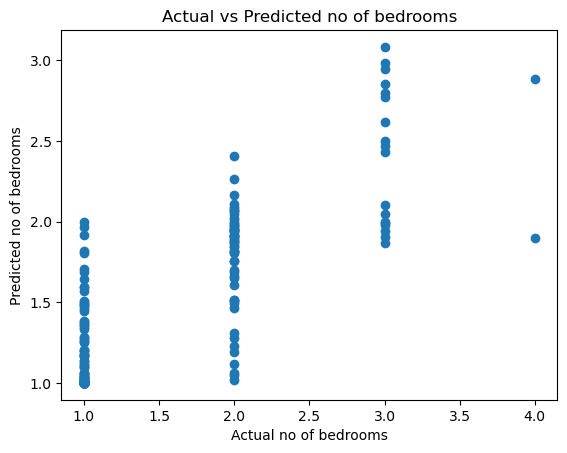

In [7]:
plt.scatter(y_test, y_test_hat)
plt.xlabel('Actual no of bedrooms')
plt.ylabel('Predicted no of bedrooms')
plt.title('Actual vs Predicted no of bedrooms')
plt.show()

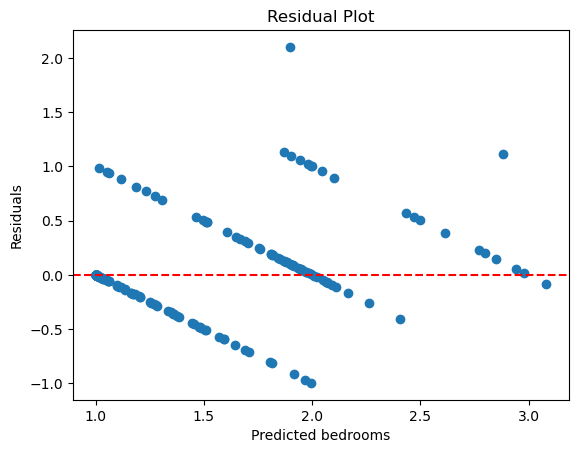

In [8]:
residuals = y_test - y_test_hat
plt.scatter(y_test_hat, residuals)
plt.xlabel('Predicted bedrooms')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()